# CHOCO CRUNCHY ANALYSIS

## 1.DATA SET COLLECTION

In [1]:
import requests
import pandas as pd

In [2]:
### step:1 DATA EXTRACTION
# empty list to collect products 
all_products = []

page_size = 100  # max allowed
total_pages = 121# 20*1000 = 20,000 possible records
#using for loop to read all pages 
for page in range(1, total_pages + 1):
    url = (f"https://world.openfoodfacts.org/api/v2/search"
           f"?categories=chocolate"
           f"&fields=code,product_name,brands,nutriments"
           f"&page_size={page_size}&page={page}")
    
    response = requests.get(url)
    data = response.json()
    products = data.get('products', [])
    if not products:
        print("No more products")
        break
    
    all_products.extend(products)
    print(f"Collected so far: {len(all_products)}")

# save to csv
df = pd.DataFrame(all_products)
df.to_csv('chocolates.csv', index=False)
print(f"Total records collected: {len(df)}")

Collected so far: 100
Collected so far: 200
Collected so far: 300
Collected so far: 400
Collected so far: 500
Collected so far: 600
Collected so far: 700
Collected so far: 800
Collected so far: 900
Collected so far: 1000
Collected so far: 1100
Collected so far: 1200
Collected so far: 1300
Collected so far: 1400
Collected so far: 1499
Collected so far: 1599
Collected so far: 1699
Collected so far: 1799
Collected so far: 1899
Collected so far: 1999
Collected so far: 2099
Collected so far: 2199
Collected so far: 2299
Collected so far: 2399
Collected so far: 2499
Collected so far: 2599
Collected so far: 2699
Collected so far: 2799
Collected so far: 2899
Collected so far: 2999
Collected so far: 3099
Collected so far: 3199
Collected so far: 3299
Collected so far: 3399
Collected so far: 3499
Collected so far: 3599
Collected so far: 3699
Collected so far: 3799
Collected so far: 3899
Collected so far: 3999
Collected so far: 4099
Collected so far: 4199
Collected so far: 4299
Collected so far: 43

In [3]:
df

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,perly,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا
...,...,...,...,...
12092,Nestlé,7613034975386,"{'carbohydrates': 38.9, 'carbohydrates_100g': ...",Extrême original - vanille pépites de nougatine
12093,Suzi Wan,4002359006975,"{'carbohydrates': 0.7, 'carbohydrates_100g': 0...",Lait de coco light
12094,"Terres et Céréales, Terres et Céréales Bio",3421557502453,"{'carbohydrates': 65, 'carbohydrates_100g': 65...",Muesli croustillant avoine myrtilles chia
12095,"Autres secs, Blédina, Blédiscuit, Danone",3041090010866,"{'carbohydrates': 76, 'carbohydrates_100g': 76...",Bledina mon premier boudoir


## 2.DATA EXPLORATION AND CLEANING 

In [55]:
### checking the missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brands        11552 non-null  object
 1   code          12097 non-null  object
 2   nutriments    12097 non-null  object
 3   product_name  11839 non-null  object
dtypes: object(4)
memory usage: 378.2+ KB


In [56]:
df.isnull().sum()

brands          545
code              0
nutriments        0
product_name    258
dtype: int64

In [57]:
df.head()

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,perly,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا


## 3.FEATURE ENGINEERING

In [58]:
nutriments_df = pd.json_normalize(df['nutriments'])

In [59]:
nutriments_df.columns

Index(['carbohydrates', 'carbohydrates_100g', 'carbohydrates_serving',
       'carbohydrates_unit', 'carbohydrates_value', 'energy', 'energy-kcal',
       'energy-kcal_100g', 'energy-kcal_serving', 'energy-kcal_unit',
       ...
       'plant-stanols_serving', 'plant-stanols_unit', 'plant-stanols_value',
       'beta-glucane-d-avoine', 'beta-glucane-d-avoine_100g',
       'beta-glucane-d-avoine_label', 'beta-glucane-d-avoine_modifier',
       'beta-glucane-d-avoine_serving', 'beta-glucane-d-avoine_unit',
       'beta-glucane-d-avoine_value'],
      dtype='object', length=1432)

In [60]:
req_nutriments_df = nutriments_df[['energy-kcal', 'energy-kj','carbohydrates','sugars','fat','saturated-fat','proteins','fiber','salt','sodium','nova-group','nutrition-score-fr','fruits-vegetables-nuts-estimate-from-ingredients']]

In [61]:
req_nutriments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   energy-kcal                                       11327 non-null  float64
 1   energy-kj                                         6445 non-null   float64
 2   carbohydrates                                     11326 non-null  float64
 3   sugars                                            11143 non-null  float64
 4   fat                                               11360 non-null  float64
 5   saturated-fat                                     11094 non-null  float64
 6   proteins                                          11348 non-null  float64
 7   fiber                                             8323 non-null   float64
 8   salt                                              11083 non-null  float64
 9   sodium           

In [62]:
tot_df = pd.concat([df[['code','product_name','brands']], req_nutriments_df], axis=1)

In [63]:
tot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   code                                              12097 non-null  object 
 1   product_name                                      11839 non-null  object 
 2   brands                                            11552 non-null  object 
 3   energy-kcal                                       11327 non-null  float64
 4   energy-kj                                         6445 non-null   float64
 5   carbohydrates                                     11326 non-null  float64
 6   sugars                                            11143 non-null  float64
 7   fat                                               11360 non-null  float64
 8   saturated-fat                                     11094 non-null  float64
 9   proteins         

In [64]:
tot_df.head()

,code,product_name,brands,energy-kcal,energy-kj,carbohydrates,sugars,fat,saturated-fat,proteins,fiber,salt,sodium,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients
0,6111035000430,Sidi Ali,Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,NaN
1,6111242100992,perly,perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6111035002175,Sidi Ali,sidi ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06500,0.026000,1.0,0.0,NaN
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06500,0.026000,1.0,0.0,NaN
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,NaN


In [65]:
### NEW COLUMNS TO DERIVE
# 1. Sugar-to-Carb Ratio
tot_df["sugar_to_carb_ratio"] = tot_df["sugars"] / tot_df["carbohydrates"]
tot_df["sugar_to_carb_ratio"] = tot_df["sugar_to_carb_ratio"].replace([float("inf"), -float("inf")], None)

# 2. Calorie Category
def calorie_category(kcal):
    if pd.isna(kcal):
        return None
    elif kcal <= 100:
        return "Low"
    elif kcal <= 200:
        return "Moderate"
    else:
        return "High"

tot_df["calorie_category"] = tot_df["energy-kcal"].apply(calorie_category)

# 3. Sugar Category
def sugar_category(sugar):
    if pd.isna(sugar):
        return None
    elif sugar <= 5:
        return "Low Sugar"
    elif sugar <= 15:
        return "Moderate Sugar"
    else:
        return "High Sugar"

tot_df["sugar_category"] = tot_df["sugars"].apply(sugar_category)

# 4. Ultra-Processed Flag
tot_df["is_ultra_processed"] = tot_df["nova-group"].apply(
    lambda x: "Yes" if x == 4 else ("No" if pd.notna(x) else None)
)


## EDA

In [66]:
tot_df.shape

(12097, 20)

In [67]:
tot_df.describe()

,energy-kcal,energy-kj,carbohydrates,sugars,fat,saturated-fat,proteins,fiber,salt,sodium,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients
count,11327.000000,6445.000000,11326.000000,11143.000000,11360.000000,11094.000000,11348.000000,8.323000e+03,11083.000000,11083.000000,10844.000000,10474.000000,2.000000
mean,278.687526,1217.400955,29.266562,11.409764,14.823276,5.103578,7.262820,7.342595e+08,1.255847,0.502339,3.296108,8.943384,54.000000
std,476.925150,850.382096,93.548112,19.335579,38.063556,11.083011,29.527119,6.698685e+10,10.462930,4.185172,1.017789,9.770152,62.225397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-17.000000,10.000000
25%,90.000000,414.000000,4.654167,1.000000,1.200000,0.300000,1.400000,5.000000e-01,0.040000,0.016000,3.000000,1.000000,32.000000
50%,240.000000,1185.000000,15.000000,4.100000,6.200000,1.400000,5.600000,2.400000e+00,0.325000,0.130000,4.000000,7.000000,54.000000
75%,433.000000,1873.000000,55.000000,13.000000,21.000000,5.900000,9.300000,5.500000e+00,0.980000,0.392000,4.000000,16.000000,76.000000
max,45793.499044,3768.000000,8989.000000,895.000000,3400.000000,595.000000,3000.000000,6.111242e+12,898.000000,359.200000,4.000000,51.000000,98.000000


In [68]:
print(f"Total number od Brands: {tot_df['brands'].nunique()}")
print(f"Total number od Product: {tot_df['product_name'].nunique()}")

Total number od Brands: 4064
Total number od Product: 10307


Missing Values

In [69]:
# Count missing values per column
missing = tot_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

# Percentage of missing values
missing_percent = (tot_df.isnull().mean() * 100).round(2)
print("Missing %:\n", missing_percent)


Missing values:
 fruits-vegetables-nuts-estimate-from-ingredients    12095
energy-kj                                            5652
fiber                                                3774
nutrition-score-fr                                   1623
sugar_to_carb_ratio                                  1605
nova-group                                           1253
is_ultra_processed                                   1253
salt                                                 1014
sodium                                               1014
saturated-fat                                        1003
sugar_category                                        954
sugars                                                954
carbohydrates                                         771
calorie_category                                      770
energy-kcal                                           770
proteins                                              749
fat                                                   7

Distributions of Key Nutrients

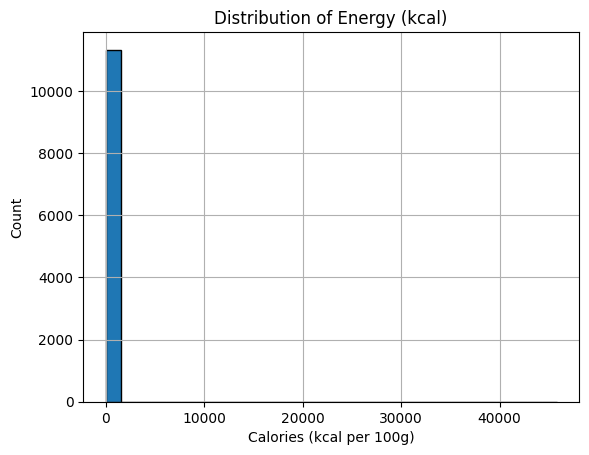

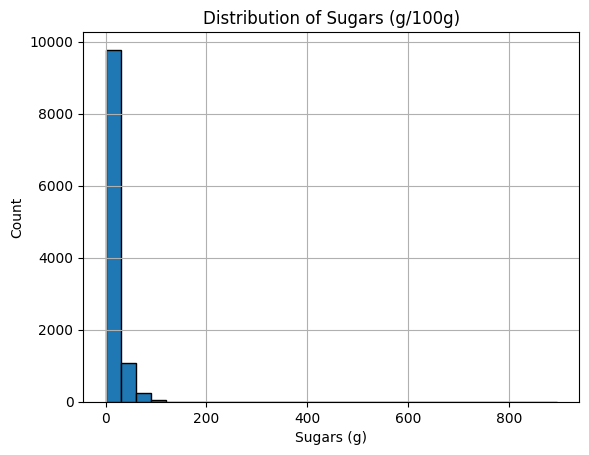

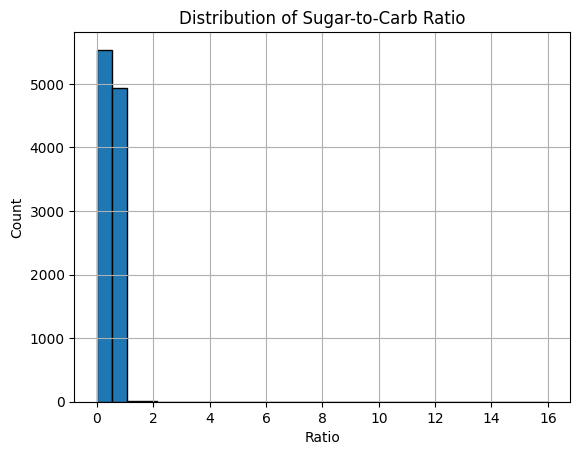

In [70]:
import matplotlib.pyplot as plt

# Histogram of energy (kcal)
tot_df["energy-kcal"].dropna().hist(bins=30, edgecolor="black")
plt.title("Distribution of Energy (kcal)")
plt.xlabel("Calories (kcal per 100g)")
plt.ylabel("Count")
plt.show()

# Histogram of sugars
tot_df["sugars"].dropna().hist(bins=30, edgecolor="black")
plt.title("Distribution of Sugars (g/100g)")
plt.xlabel("Sugars (g)")
plt.ylabel("Count")
plt.show()

# Histogram of sugar-to-carb ratio
tot_df["sugar_to_carb_ratio"].dropna().hist(bins=30, edgecolor="black")
plt.title("Distribution of Sugar-to-Carb Ratio")
plt.xlabel("Ratio")
plt.ylabel("Count")
plt.show()


Category-Based Analysis

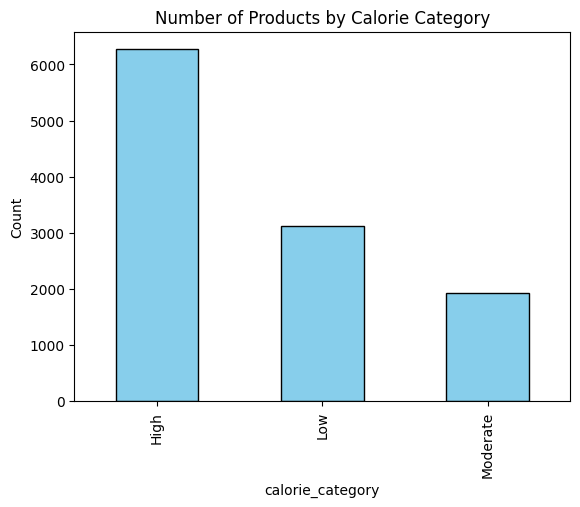

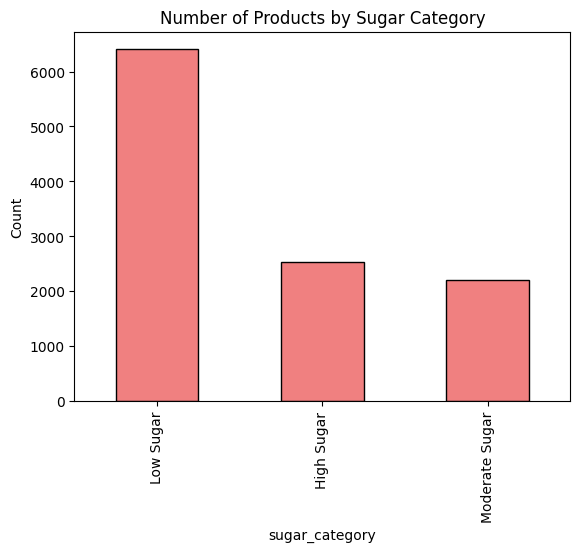

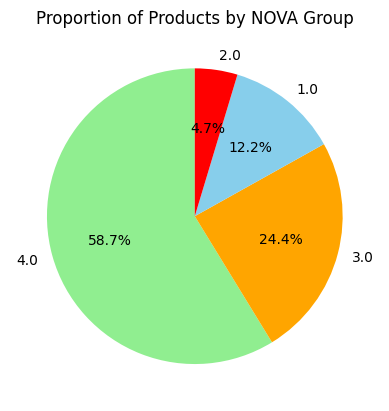

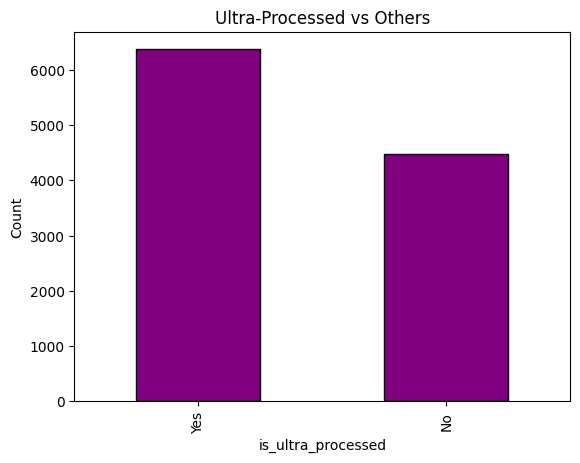

In [71]:
# Bar plot for calorie categories
tot_df["calorie_category"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Products by Calorie Category")
plt.ylabel("Count")
plt.show()

# Bar plot for sugar categories
tot_df["sugar_category"].value_counts().plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Number of Products by Sugar Category")
plt.ylabel("Count")
plt.show()

# Pie chart for NOVA groups
tot_df["nova-group"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightgreen","orange","skyblue","red"])
plt.title("Proportion of Products by NOVA Group")
plt.ylabel("")
plt.show()

# Compare ultra-processed vs others
tot_df["is_ultra_processed"].value_counts().plot(kind="bar", color="purple", edgecolor="black")
plt.title("Ultra-Processed vs Others")
plt.ylabel("Count")
plt.show()


Relationships

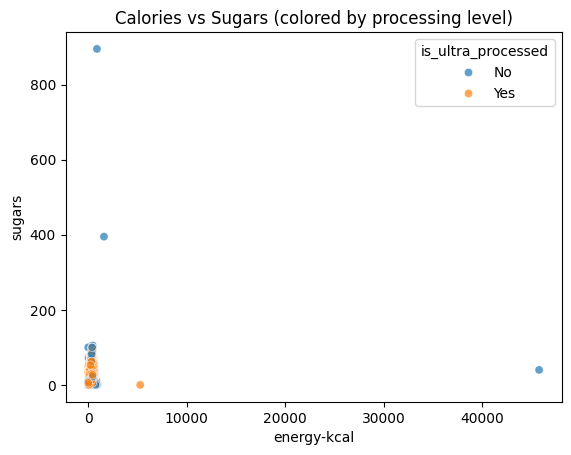

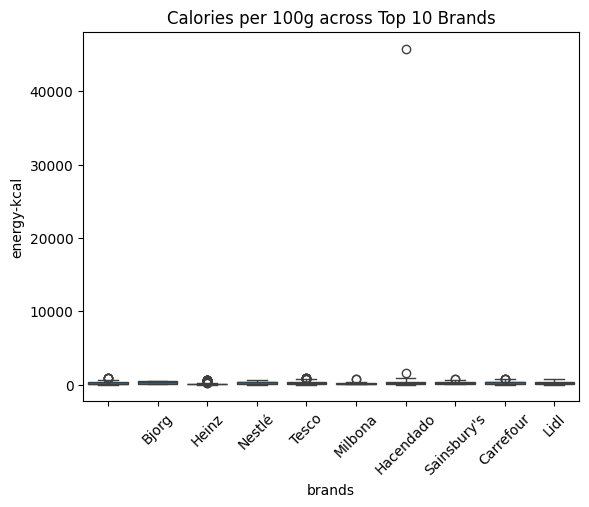

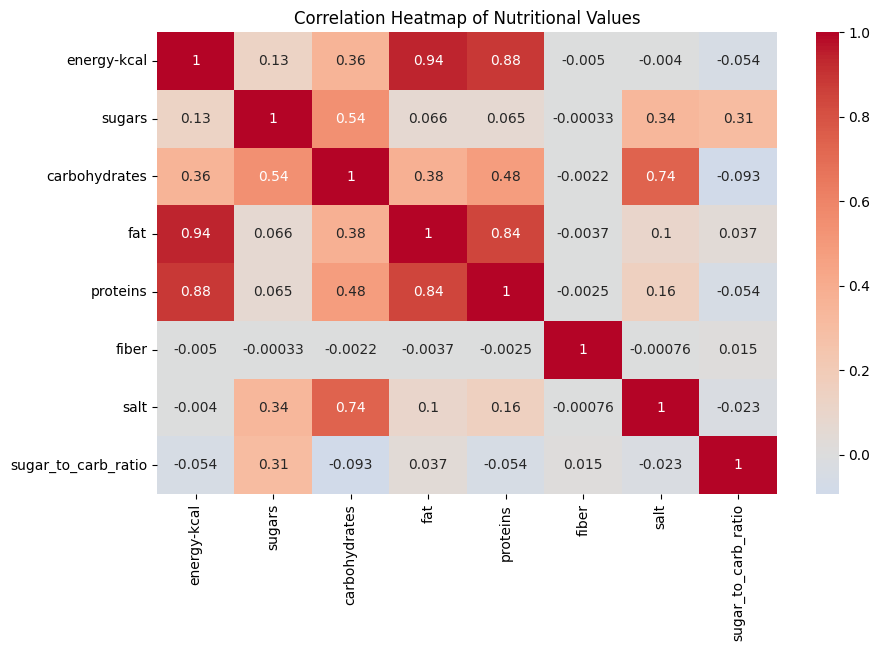

In [72]:
import seaborn as sns

# Scatter: Calories vs Sugars
sns.scatterplot(x="energy-kcal", y="sugars", data=tot_df, hue="is_ultra_processed", alpha=0.7)
plt.title("Calories vs Sugars (colored by processing level)")
plt.show()

# Boxplot: Calories by Brand (top 10 brands)
top_brands = tot_df["brands"].value_counts().head(10).index
sns.boxplot(x="brands", y="energy-kcal", data=tot_df[tot_df["brands"].isin(top_brands)])
plt.xticks(rotation=45)
plt.title("Calories per 100g across Top 10 Brands")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tot_df[["energy-kcal", "sugars", "carbohydrates", "fat", "proteins", "fiber", "salt", "sugar_to_carb_ratio"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Nutritional Values")
plt.show()


Brand-Level insights

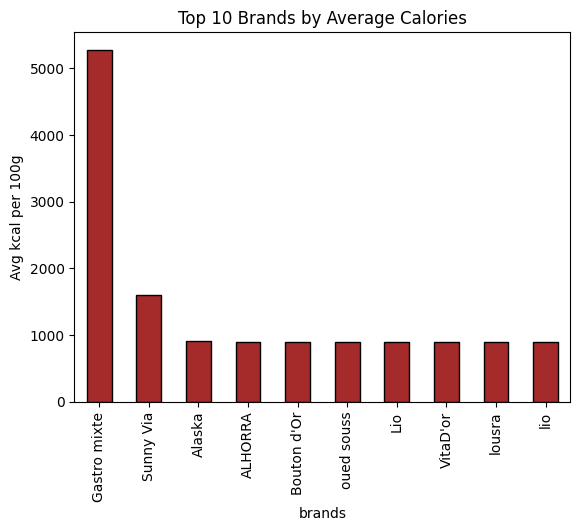

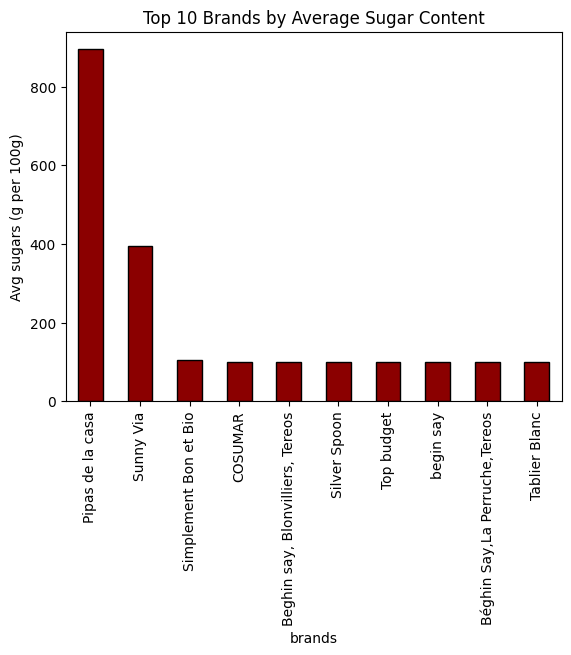

In [73]:
# Top 10 brands with highest average calories
brand_calories = tot_df.groupby("brands")["energy-kcal"].mean().sort_values(ascending=False).head(10)
brand_calories.plot(kind="bar", color="brown", edgecolor="black")
plt.title("Top 10 Brands by Average Calories")
plt.ylabel("Avg kcal per 100g")
plt.show()

# Top 10 brands with highest average sugar
brand_sugar = tot_df.groupby("brands")["sugars"].mean().sort_values(ascending=False).head(10)
brand_sugar.plot(kind="bar", color="darkred", edgecolor="black")
plt.title("Top 10 Brands by Average Sugar Content")
plt.ylabel("Avg sugars (g per 100g)")
plt.show()


## 4.SQL TABLE INSERTION

SQL Database

In [74]:
product_df = tot_df[['code','product_name','brands']]
nutrient_df = tot_df[['code','energy-kcal', 'energy-kj','carbohydrates','sugars','fat','saturated-fat','proteins','fiber','salt','sodium','nova-group','nutrition-score-fr','fruits-vegetables-nuts-estimate-from-ingredients']]
derived_df = tot_df[['code','sugar_to_carb_ratio','calorie_category','sugar_category','is_ultra_processed']]


In [75]:
import sqlite3

# ----------------- Connect / Create DB -----------------
conn = sqlite3.connect("chocolates.db")  # will create if not exists
cursor = conn.cursor()

# ----------------- Create Tables -----------------
cursor.execute('''CREATE TABLE IF NOT EXISTS product_info (
                    product_code TEXT PRIMARY KEY,
                    product_name TEXT,
                    brand TEXT)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS nutrient_info (
                    product_code TEXT,
                    energy_kcal_value FLOAT,
                    energy_kj_value FLOAT,
                    carbohydrates_value FLOAT,
                    sugars_value FLOAT,
                    fat_value FLOAT,
                    saturated_fat_value FLOAT,
                    proteins_value FLOAT,
                    fiber_value FLOAT,
                    salt_value FLOAT,
                    sodium_value FLOAT,
                    fruits_vegetables_nuts_estimate_100g FLOAT,
                    nutrition_score_fr INTEGER,
                    nova_group INTEGER,
                    FOREIGN KEY (product_code) REFERENCES product_info(product_code))''')

cursor.execute('''CREATE TABLE IF NOT EXISTS derived_metrics (
                    product_code TEXT,
                    sugar_to_carb_ratio FLOAT,
                    calorie_category TEXT,
                    sugar_category TEXT,
                    is_ultra_processed TEXT,
                    FOREIGN KEY (product_code) REFERENCES product_info(product_code))''')

conn.commit()

# ----------------- Insert Data -----------------
# Example DataFrames: product_df, nutrient_df, derived_df
for _, row in product_df.iterrows():
    cursor.execute('''INSERT OR REPLACE INTO product_info (product_code, product_name, brand)
                      VALUES (?, ?, ?)''',
                   (row['code'], row['product_name'], row['brands']))

for _, row in nutrient_df.iterrows():
    cursor.execute('''INSERT OR REPLACE INTO nutrient_info
                      (product_code, energy_kcal_value, energy_kj_value, carbohydrates_value,
                       sugars_value, fat_value, saturated_fat_value, proteins_value, fiber_value,
                       salt_value, sodium_value, fruits_vegetables_nuts_estimate_100g,
                       nutrition_score_fr, nova_group)
                      VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                   (row['code'], row['energy-kcal'], row['energy-kj'], row['carbohydrates'],
                    row['sugars'], row['fat'], row['saturated-fat'], row['proteins'], row['fiber'],
                    row['salt'], row['sodium'], row['fruits-vegetables-nuts-estimate-from-ingredients'],
                    row['nutrition-score-fr'], row['nova-group']))

for _, row in derived_df.iterrows():
    cursor.execute('''INSERT OR REPLACE INTO derived_metrics
                      (product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed)
                      VALUES (?, ?, ?, ?, ?)''',
                   (row['code'], row['sugar_to_carb_ratio'], row['calorie_category'],
                    row['sugar_category'], row['is_ultra_processed']))

conn.commit()
#conn.close()


## 5.SQL QUERIES

In [76]:
def execute_query(query):
    query_df = pd.read_sql(query, conn)
    return query_df

product_info Table Queries
1. Count products per brand

In [77]:
query_1 = """SELECT brand, COUNT(*) AS product_count
FROM product_info
GROUP BY brand;"""
print(execute_query(query_1))

                                                  brand  product_count
0                                                  None            545
1                                                                  109
2                                                  10dh              1
3     1540 Vestby, Norwegen, Oluf Lorentzen AS, Tove...              1
4     166, 43122 Parma - Italy, Barilla, Barilla - B...              1
...                                                 ...            ...
4063                                               كنور              1
4064                                            كوسومار              1
4065                                            لاسيگون              1
4066                                               نلزه              1
4067                         ولماس ماء معدني غازي طبيعي              1

[4068 rows x 2 columns]


2. Count unique products per brand

In [78]:
query_2  = """SELECT brand, COUNT(DISTINCT product_name) AS unique_products
FROM product_info
GROUP BY brand;"""
print(execute_query(query_2))

                                                  brand  unique_products
0                                                  None              313
1                                                                     69
2                                                  10dh                1
3     1540 Vestby, Norwegen, Oluf Lorentzen AS, Tove...                1
4     166, 43122 Parma - Italy, Barilla, Barilla - B...                1
...                                                 ...              ...
4063                                               كنور                1
4064                                            كوسومار                1
4065                                            لاسيگون                1
4066                                               نلزه                1
4067                         ولماس ماء معدني غازي طبيعي                1

[4068 rows x 2 columns]


3. Top 5 brands by product count

In [79]:
query_3 = """SELECT brand, COUNT(*) AS product_count
FROM product_info
GROUP BY brand
ORDER BY product_count DESC
LIMIT 5;
"""
print(execute_query(query_3))

       brand  product_count
0       None            545
1  Hacendado            388
2      Tesco            266
3  Carrefour            148
4                       109


4. Products with missing product name

In [80]:
query_4 ="""SELECT *
FROM product_info
WHERE product_name IS NULL OR product_name = '';
"""
print(execute_query(query_4))

      product_code product_name      brand
0    8712561538077                    Dove
1    6111242100985                  Jaouda
2    6111099003897                   lilia
3    6111128000460               aïn Saiss
4    8425197712024                  Maruja
..             ...          ...        ...
545  6111018909323         None       None
546  6111243510547         None       None
547  6111128001351         None       None
548  6111270420024         None       None
549  5111463502828         None       None

[550 rows x 3 columns]


5. Number of unique brands

In [81]:
query_5 = """SELECT COUNT(DISTINCT brand) AS unique_brands
FROM product_info;
"""
print(execute_query(query_5))

   unique_brands
0           4067


6. Products with code starting with '3'

In [82]:
query_6 = """SELECT *
FROM product_info
WHERE product_code LIKE '3%';
"""
print(execute_query(query_6))

       product_code                               product_name  \
0     3450601046254                              3450601046254   
1     3274080005003                              Eau De Source   
2     3046920029759                           Supreme Dark 90%   
3     3046920028004                              70% chocolate   
4     3017620425035                                    Nutella   
...             ...                                        ...   
3593  3560070581870                                    Crunchy   
3594  3564700562802                           Brioche tranchée   
3595  3421557502453  Muesli croustillant avoine myrtilles chia   
3596  3041090010866                Bledina mon premier boudoir   
3597  3124480183927                   PET 1.5L SCHWEPPES LEMON   

                                           brand  
0                                   l'arbre vert  
1                                     Cristaline  
2                                          Lindt  
3  

nutrient_info Table Queries

1. Top 10 products with highest energy-kcal_value

In [83]:
query_1 = """SELECT product_code, energy_kcal_value
FROM nutrient_info
ORDER BY energy_kcal_value DESC
LIMIT 10;
"""
print(execute_query(query_1))

    product_code  energy_kcal_value
0  8480000054647       45793.499044
1  8480000054647       45793.499044
2  8480000054647       45793.499044
3  8480000054647       45793.499044
4  8480000054647       45793.499044
5  6111259090132        5280.000000
6  6111259090132        5280.000000
7  6111259090132        5280.000000
8  6111259090132        5280.000000
9  6111259090132        5280.000000


2. Average sugars_value per nova-group

In [84]:
query_2 = """SELECT nova_group, AVG(sugars_value) AS avg_sugars
FROM nutrient_info
GROUP BY nova_group;
"""
print(execute_query(query_2))

   nova_group  avg_sugars
0         NaN   12.091473
1         1.0    6.069723
2         2.0   18.912420
3         3.0    7.048082
4         4.0   13.627794


3. Count products with fat_value > 20g

In [85]:
query_3 = """SELECT COUNT(*) AS high_fat_products
FROM nutrient_info
WHERE fat_value > 20;
"""
print(execute_query(query_3))

   high_fat_products
0              14636


4. Average carbohydrates_value per product

In [86]:
query_4 = """SELECT AVG(carbohydrates_value) AS avg_carbs
FROM nutrient_info;
"""
print(execute_query(query_4))

   avg_carbs
0  29.296141


5. Products with sodium_value > 1g

In [87]:
query_5 ="""SELECT *
FROM nutrient_info
WHERE sodium_value > 1;
"""
print(execute_query(query_5))

       product_code  energy_kcal_value  energy_kj_value  carbohydrates_value  \
0          50184453              260.0           1100.0                 30.0   
1     6111184001562                NaN              NaN                  0.0   
2     6111184001197              563.0              NaN                  0.0   
3     8715035110106               77.0            325.0                  3.0   
4     8076809513753              492.0           2030.0                 11.0   
...             ...                ...              ...                  ...   
2485  4056489556930              246.0           1024.0                 23.0   
2486  5000328149035              490.0           2051.0                 59.4   
2487  5060366570086              189.0            791.0                 18.0   
2488  8422229110308              499.0           2066.0                  1.0   
2489       00133272              259.0           1084.0                  0.5   

      sugars_value  fat_value  saturate

6. Count products with non-zero fruits/vegetables/nuts content

In [88]:
query_6 ="""SELECT COUNT(*) AS products_with_fvn
FROM nutrient_info
WHERE fruits_vegetables_nuts_estimate_100g > 0;
"""
print(execute_query(query_6))

   products_with_fvn
0                 10


7. Products with energy-kcal_value > 500

In [89]:
query_7 ="""SELECT *
FROM nutrient_info
WHERE energy_kcal_value > 500;
"""
print(execute_query(query_7))

       product_code  energy_kcal_value  energy_kj_value  carbohydrates_value  \
0     6111099003897              675.0              NaN                 0.20   
1     3046920028004              566.0           2350.0                34.00   
2     3017620425035              539.0           2252.0                57.50   
3     3046920028363              584.0           2418.0                22.00   
4     6111184004129              592.0           2435.4                 0.22   
...             ...                ...              ...                  ...   
8698  5053990175888              521.0              NaN                54.00   
8699  6111250476959              507.0              NaN                  NaN   
8700  5053827157018              521.0           2169.0                41.00   
8701  3660603004828              551.0              NaN                 2.70   
8702  3270190020288              743.0           3056.0                 0.60   

      sugars_value  fat_value  saturate

derived_metrics Table Queries

1. Count products per calorie_category

In [90]:
query_1 = """SELECT calorie_category, COUNT(*) AS product_count
FROM derived_metrics
GROUP BY calorie_category;
"""
print(execute_query(query_1))

  calorie_category  product_count
0             None           3844
1             High          31318
2              Low          15622
3         Moderate           9601


2. Count of High Sugar products

In [91]:
query_2 = """SELECT COUNT(*) AS high_sugar_products
FROM derived_metrics
WHERE sugar_category = 'High Sugar';
"""
print(execute_query(query_2))

   high_sugar_products
0                12612


3. Average sugar_to_carb_ratio for High Calorie products

In [92]:
query_3  = """SELECT AVG(sugar_to_carb_ratio) AS avg_ratio
FROM derived_metrics
WHERE calorie_category = 'High';
"""
print(execute_query(query_3))

   avg_ratio
0   0.440277


4. Products that are both High Calorie and High Sugar

In [93]:
query_4 =  """SELECT *
FROM derived_metrics
WHERE calorie_category = 'High' AND sugar_category = 'High Sugar';
"""
print(execute_query(query_4))


        product_code  sugar_to_carb_ratio calorie_category sugar_category  \
0      7622210449283             0.463768             High     High Sugar   
1      3046920028004             0.882353             High     High Sugar   
2      3017620425035             0.979130             High     High Sugar   
3      3175680011480             0.265625             High     High Sugar   
4      6111162000839             1.027230             High     High Sugar   
...              ...                  ...              ...            ...   
10986  3111900350557             0.339286             High     High Sugar   
10987  3421557502422             0.406250             High     High Sugar   
10988  7613034975386             0.745501             High     High Sugar   
10989  3421557502453             0.338462             High     High Sugar   
10990  3041090010866             0.351316             High     High Sugar   

      is_ultra_processed  
0                    Yes  
1                    

5. Number of products marked as ultra-processed

In [94]:
query_5 = """SELECT COUNT(*) AS ultra_processed_count
FROM derived_metrics
WHERE is_ultra_processed = 'Yes';
"""
print(execute_query(query_5))

   ultra_processed_count
0                  31785


6. Products with sugar_to_carb_ratio > 0.7

In [95]:
query_6 ="""SELECT *
FROM derived_metrics
WHERE sugar_to_carb_ratio > 0.7;
"""
print(execute_query(query_6))

        product_code  sugar_to_carb_ratio calorie_category  sugar_category  \
0      5449000054227             1.000000              Low  Moderate Sugar   
1      3046920028004             0.882353             High      High Sugar   
2      3017620425035             0.979130             High      High Sugar   
3      5449000147417             1.827957              Low      High Sugar   
4      6111162000839             1.027230             High      High Sugar   
...              ...                  ...              ...             ...   
20545  3229820789910             0.842105              Low       Low Sugar   
20546  3250390769811             0.891304              Low  Moderate Sugar   
20547  7613034975386             0.745501             High      High Sugar   
20548  4002359006975             0.714286              Low       Low Sugar   
20549  3124480183927             0.982456              Low  Moderate Sugar   

      is_ultra_processed  
0                    Yes  
1        

7. Average sugar_to_carb_ratio per calorie_category

In [96]:
query_7 = """SELECT calorie_category, AVG(sugar_to_carb_ratio) AS avg_ratio
FROM derived_metrics
GROUP BY calorie_category;
"""
print(execute_query(query_7))

  calorie_category  avg_ratio
0             None   0.650523
1             High   0.440277
2              Low   0.689457
3         Moderate   0.468281


Join Queries (product_info + nutrient_info + derived_metrics)

1. Top 5 brands with most High Calorie products

In [97]:
query_1 = """SELECT p.brand, COUNT(*) AS high_calorie_count
FROM product_info p
JOIN derived_metrics d ON p.product_code = d.product_code
WHERE d.calorie_category = 'High'
GROUP BY p.brand
ORDER BY high_calorie_count DESC
LIMIT 5;
"""
print(execute_query(query_1))

       brand  high_calorie_count
0  Hacendado                1002
1       None                 747
2      Tesco                 633
3  Carrefour                 473
4  Kellogg's                 309


2. Average energy-kcal_value for each calorie_category

In [98]:
query_2 = """SELECT d.calorie_category, AVG(n.energy_kcal_value) AS avg_energy
FROM derived_metrics d
JOIN nutrient_info n ON d.product_code = n.product_code
GROUP BY d.calorie_category;
"""
print(execute_query(query_2))

  calorie_category  avg_energy
0             None  227.686667
1             High  433.884405
2              Low   50.010721
3         Moderate  145.562282


3. Count of ultra-processed products per brand

In [99]:
query_3 = """SELECT p.brand, COUNT(*) AS ultra_processed_count
FROM product_info p
JOIN derived_metrics d ON p.product_code = d.product_code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brand;
"""
print(execute_query(query_3))

                               brand  ultra_processed_count
0                               None                    610
1                                                       149
2                               1664                      5
3               2 KEEP NATURAL BITES                      5
4     25l, Red Bull, Zero 0, RedBull                      5
...                              ...                    ...
2396                           Краси                      5
2397                         الخيرات                      5
2398                            الكف                      5
2399                            حلال                      5
2400                            رفيع                      5

[2401 rows x 2 columns]


4. Products with High Sugar and High Calorie along with brand

In [100]:
query_4 ="""SELECT p.brand, p.product_name, d.calorie_category, d.sugar_category
FROM product_info p
JOIN derived_metrics d ON p.product_code = d.product_code
WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar';
"""
print(execute_query(query_4))

                                            brand  \
0                                              Lu   
1                                Lindt & Sprüngli   
2                                         Ferrero   
3                                          Gerblé   
4                                         Délicia   
...                                           ...   
10986                                   favrichon   
10987                      Terres et Céréales Bio   
10988                                      Nestlé   
10989  Terres et Céréales, Terres et Céréales Bio   
10990    Autres secs, Blédina, Blédiscuit, Danone   

                                          product_name calorie_category  \
0                                 Prince Goût Chocolat             High   
1                                        70% chocolate             High   
2                                              Nutella             High   
3                                               Sésame         

5. Average sugar content per brand for ultra-processed products

In [101]:
query_5 = """SELECT p.brand, AVG(n.sugars_value) AS avg_sugar
FROM product_info p
JOIN nutrient_info n ON p.product_code = n.product_code
JOIN derived_metrics d ON p.product_code = d.product_code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brand;
"""
print(execute_query(query_5))

                               brand  avg_sugar
0                               None  17.169246
1                                     14.793277
2                               1664   0.000000
3               2 KEEP NATURAL BITES  26.000000
4     25l, Red Bull, Zero 0, RedBull        NaN
...                              ...        ...
2396                           Краси   0.700000
2397                         الخيرات   0.000000
2398                            الكف        NaN
2399                            حلال   0.000000
2400                            رفيع        NaN

[2401 rows x 2 columns]


6. Number of products with fruits/vegetables/nuts content in each calorie_category

In [102]:
query_6 = """SELECT d.calorie_category, COUNT(*) AS fvn_products
FROM derived_metrics d
JOIN nutrient_info n ON d.product_code = n.product_code
WHERE n.fruits_vegetables_nuts_estimate_100g > 0
GROUP BY d.calorie_category;
"""
print(execute_query(query_6))

  calorie_category  fvn_products
0              Low            25
1         Moderate            25


7. Top 5 products by sugar_to_carb_ratio with their calorie and sugar category

In [103]:
query_7 = """SELECT p.product_name, d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category
FROM product_info p
JOIN derived_metrics d ON p.product_code = d.product_code
ORDER BY d.sugar_to_carb_ratio DESC
LIMIT 5;
"""
print(execute_query(query_7))

                product_name  sugar_to_carb_ratio calorie_category  \
0  Beurre Gastronomique Doux                 16.0             High   
1  Beurre Gastronomique Doux                 16.0             High   
2  Beurre Gastronomique Doux                 16.0             High   
3  Beurre Gastronomique Doux                 16.0             High   
4  Beurre Gastronomique Doux                 16.0             High   

  sugar_category  
0      Low Sugar  
1      Low Sugar  
2      Low Sugar  
3      Low Sugar  
4      Low Sugar  
